## Author: Habib Khalil

* Section A
* Univariate Analysis
* Data Preprossesing
* Bivariate Analysis
* Section B
* Modelling
* Section C
* Section D
* Reference

### A 1
The functionality of the system is to assist in hospital readmission prediction using clinical features. It provides a platform to analyse and model data related to patient's clinical information. The system utilizes machine learning techniques to develop predictive models that can estimate the likelihood of a patient being readmitted to the hospital for the same problem immediately after discharge.

### A 2

The basic inputs for the system are the clinical features of patients, which include attributes: age, time_in_hospital, n_lab_procedures, n_procedures, n_medications,  n_outpatient, n_inpatient, n_emergency, diag_1, diag_2, diag_3, glucose_test, A1Ctest, change, diabetes_med and the target variable readmitted. These inputs are used to train and evaluate machine learning models for readmission prediction.
The basic output of the system is the prediction or probability of a patient being readmitted to the hospital. The system may also provide additional evaluation metrics such as accuracy, area under the ROC curve, recall, precision, and confusion matrix to assess the performance of the predictive models.

### A 3

The real-world problem that the system solves is hospital readmission prediction. Hospital readmissions can be costly, both in terms of healthcare resources and patient well-being. By accurately predicting the likelihood of readmission, healthcare providers can take proactive measures to improve patient care, allocate resources effectively, and implement targeted interventions to reduce readmission rates, and provide insights into which patients are at a higher risk of readmission.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
import statistics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)


#dataset used in this analysis can be obtained from: https://www.kaggle.com/datasets/dubradave/hospital-readmissions

In [2]:
df = pd.read_csv('C://Users//pc//Desktop//DataMining//hospitalreadmissions.csv') #importing data from local pc

In [3]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
df.tail()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no
24999,[50-60),10,37,1,24,0,0,0,Missing,Other,Diabetes,Circulatory,no,no,no,no,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [7]:
df.describe(include=("object"))

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,7,8,8,8,3,3,2,2,2
top,[70-80),Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,12382,7824,9056,9107,23625,20938,13497,19228,13246


In [8]:
df.nunique()

age                    6
time_in_hospital      14
n_lab_procedures     109
n_procedures           7
n_medications         70
n_outpatient          23
n_inpatient           16
n_emergency           21
medical_specialty      7
diag_1                 8
diag_2                 8
diag_3                 8
glucose_test           3
A1Ctest                3
change                 2
diabetes_med           2
readmitted             2
dtype: int64

In [9]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [10]:
#removing as the they are mainly empty
df.replace('Missing', np.nan, inplace=True)

In [11]:
(df.isnull().sum()/len(df))

age                  0.00000
time_in_hospital     0.00000
n_lab_procedures     0.00000
n_procedures         0.00000
n_medications        0.00000
n_outpatient         0.00000
n_inpatient          0.00000
n_emergency          0.00000
medical_specialty    0.49528
diag_1               0.00016
diag_2               0.00168
diag_3               0.00784
glucose_test         0.00000
A1Ctest              0.00000
change               0.00000
diabetes_med         0.00000
readmitted           0.00000
dtype: float64

In [12]:
# almost 50% missing values therefore we will drop the variable
df.drop('medical_specialty', axis=1, inplace=True)

# droping na columns as they make less than 0.1% in 
df.dropna(inplace=True)

# deleting any duplicates
df.drop_duplicates(inplace=True)

# below 3 variable were converted to categorical variable of yes and no's as they have alot of 0 values.
df['n_outpatient'] = df['n_outpatient'].apply(lambda x: 1 if x >= 1 else (0 if x < 1 else np.nan))
df['n_inpatient'] = df['n_inpatient'].apply(lambda x: 1 if x >= 1 else (0 if x < 1 else np.nan))
df['n_emergency'] = df['n_emergency'].apply(lambda x: 1 if x >= 1 else (0 if x < 1 else np.nan))
df['n_procedures'] = df['n_procedures'].apply(lambda x: 1 if x >= 1 else (0 if x < 1 else np.nan))

# Plotting numerical variables

In [13]:
# Log-transform the numerical variables
variables = ['time_in_hospital', 'n_medications']
for var in variables:
    df[var] = np.log(df[var].replace(0, np.nan))

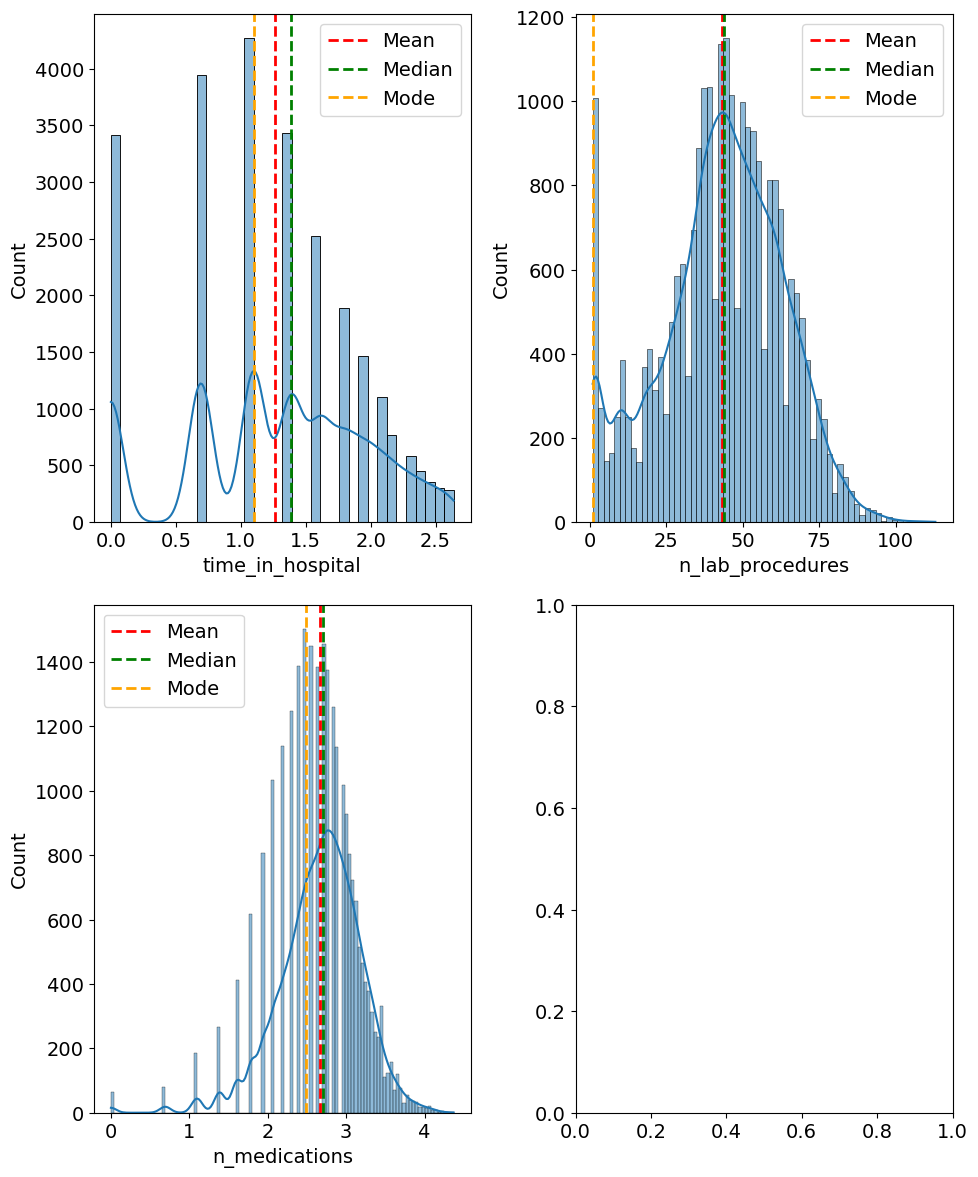

In [14]:
# Create a list of variables
variables = ['time_in_hospital', 'n_lab_procedures', 'n_medications']

# Set up the figure with 3 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))

# Loop through the variables and plot histograms in each subplot
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=var, kde=True, ax=axs[row, col])
    axs[row, col].axvline(df[var].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axs[row, col].axvline(df[var].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    axs[row, col].axvline(df[var].mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')
    axs[row, col].legend()

# Adjust the space between the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# create a list of your variables
variables = ['time_in_hospital', 'n_lab_procedures', 'n_medications']

# loop through each variable and calculate the mode
for var in variables:
    mode_value = statistics.mode(df[var])
    print(f"Mode for {var}: {mode_value}")

Mode for time_in_hospital: 1.0986122886681098
Mode for n_lab_procedures: 1
Mode for n_medications: 2.4849066497880004


In [16]:
def print_skewness_kurtosis(df, columns):
    for column in columns:
        skewness = df[column].skew()
        kurtosis = df[column].kurt()
        print(f"{column}:")
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")
        print("------------------------")
columns_to_check = ["time_in_hospital", 'n_lab_procedures', "n_medications"]
print_skewness_kurtosis(df, columns_to_check)

time_in_hospital:
Skewness: -0.24032173196230158
Kurtosis: -0.6937094700528017
------------------------
n_lab_procedures:
Skewness: -0.2409245024294668
Kurtosis: -0.29659646843253595
------------------------
n_medications:
Skewness: -0.7532938519044029
Kurtosis: 2.0548126430121068
------------------------


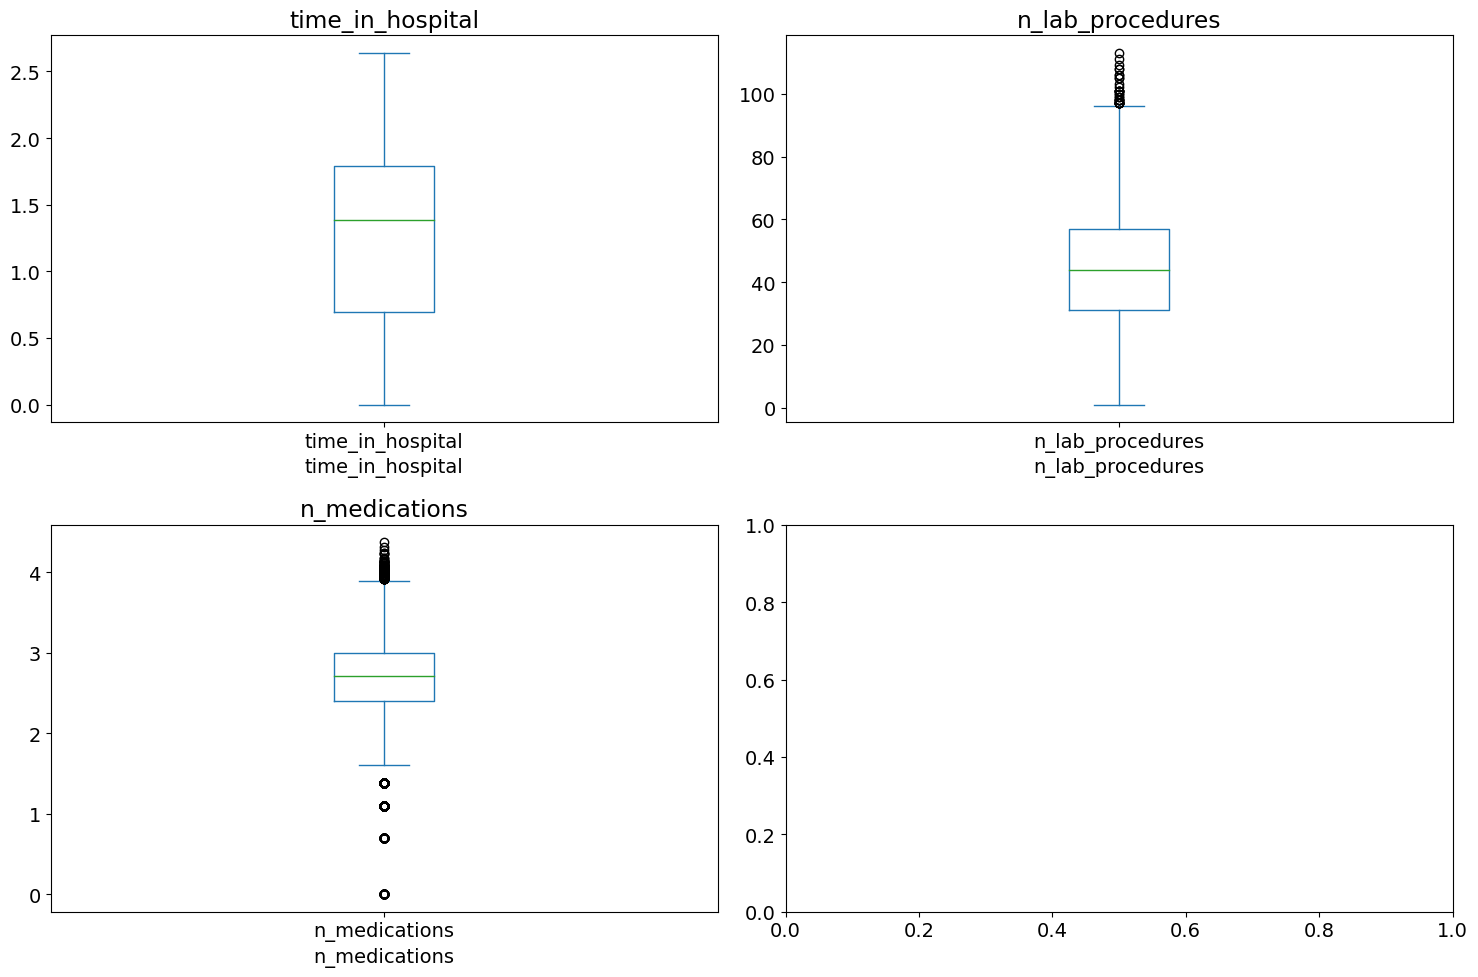

In [17]:
def plot_boxplots(df, columns):
    n_cols = len(columns)
    n_rows = math.ceil(n_cols / 2)
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5*n_rows))

    for i in range(n_cols):
        r = i // 2
        c = i % 2
        df[columns[i]].plot(kind='box', ax=axes[r, c])
        axes[r, c].set_title(columns[i])
        axes[r, c].set_xlabel(columns[i])

    fig.tight_layout()
    plt.show()

columns_to_plot = ["time_in_hospital", "n_lab_procedures", "n_medications"]
plot_boxplots(df, columns_to_plot)

In [18]:
### removal of outliers
Q1 = df[["time_in_hospital", "n_lab_procedures", "n_medications"]].quantile(0.25)
Q3 = df[["time_in_hospital", "n_lab_procedures", "n_medications"]].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[["time_in_hospital", "n_lab_procedures", "n_medications"]] < (Q1 - 1.5 * IQR)) |(df[["time_in_hospital", "n_lab_procedures", "n_medications"]] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot: >

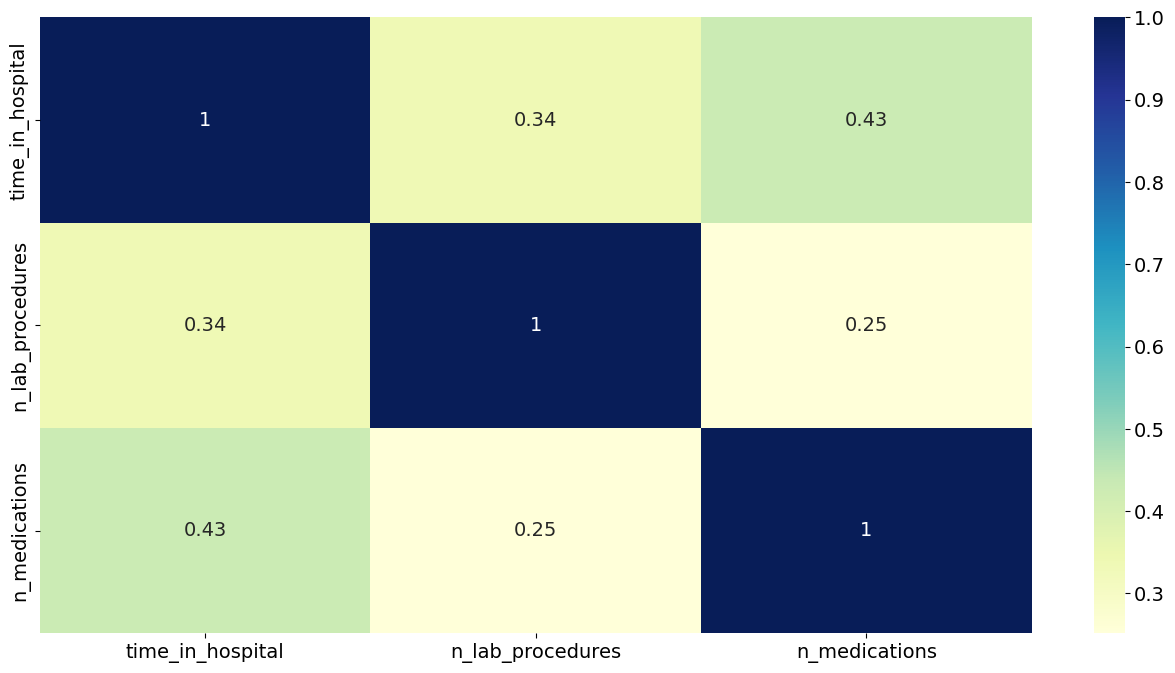

In [19]:
cols = ['time_in_hospital', 'n_lab_procedures', 'n_medications']

# compute the correlation matrix
corr = df[cols].corr(method = 'pearson')

# create the heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")

# there are moderate correlation between number of medication, time in hospital and no of procedures

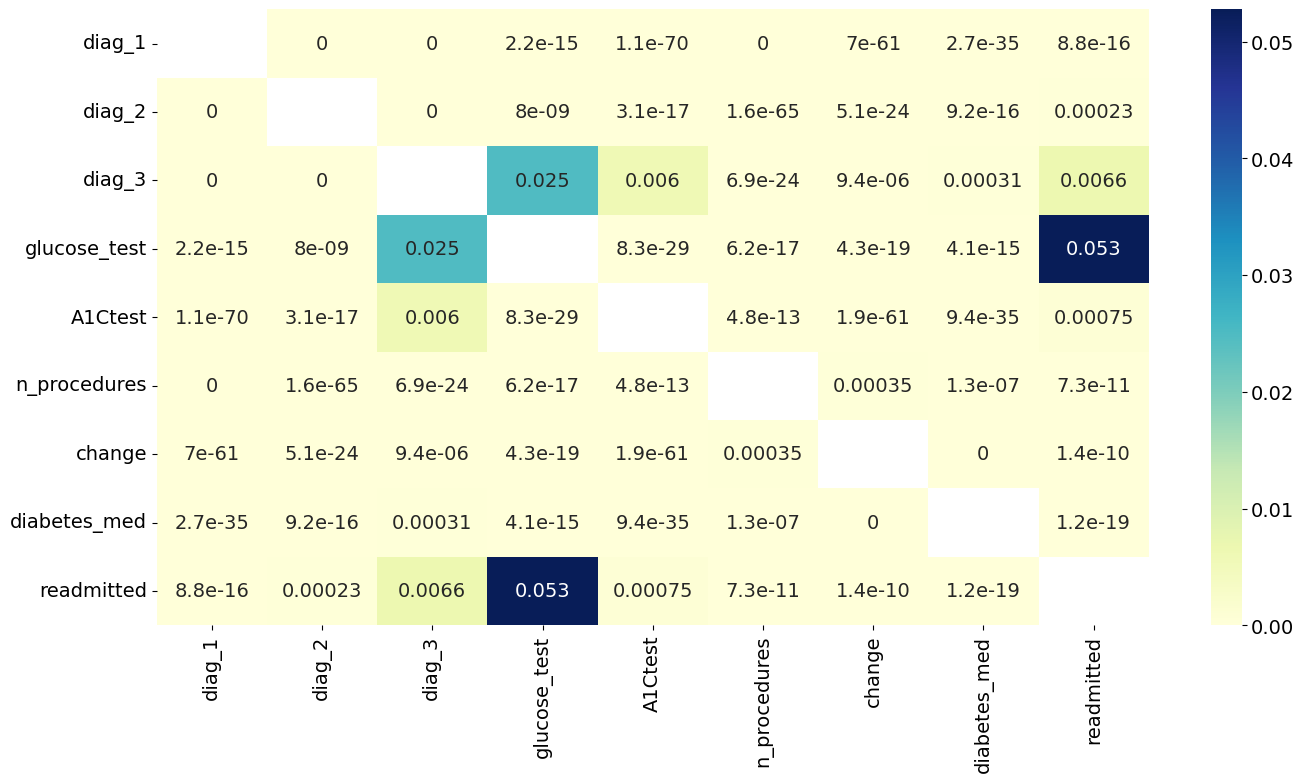

In [20]:
# Select the categorical columns
categorical_cols = ['diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'n_procedures','change', 'diabetes_med', 'readmitted']

# Compute the chi-square test for each pair of categorical variables
chi2_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cross_tab = pd.crosstab(df[col1], df[col2])
            chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)
            chi2_results.loc[col1, col2] = p_value

# Display the p-values in a heatmap
sns.heatmap(chi2_results.astype(float), annot=True, cmap="YlGnBu")
plt.show()

# Plotting categorical variables

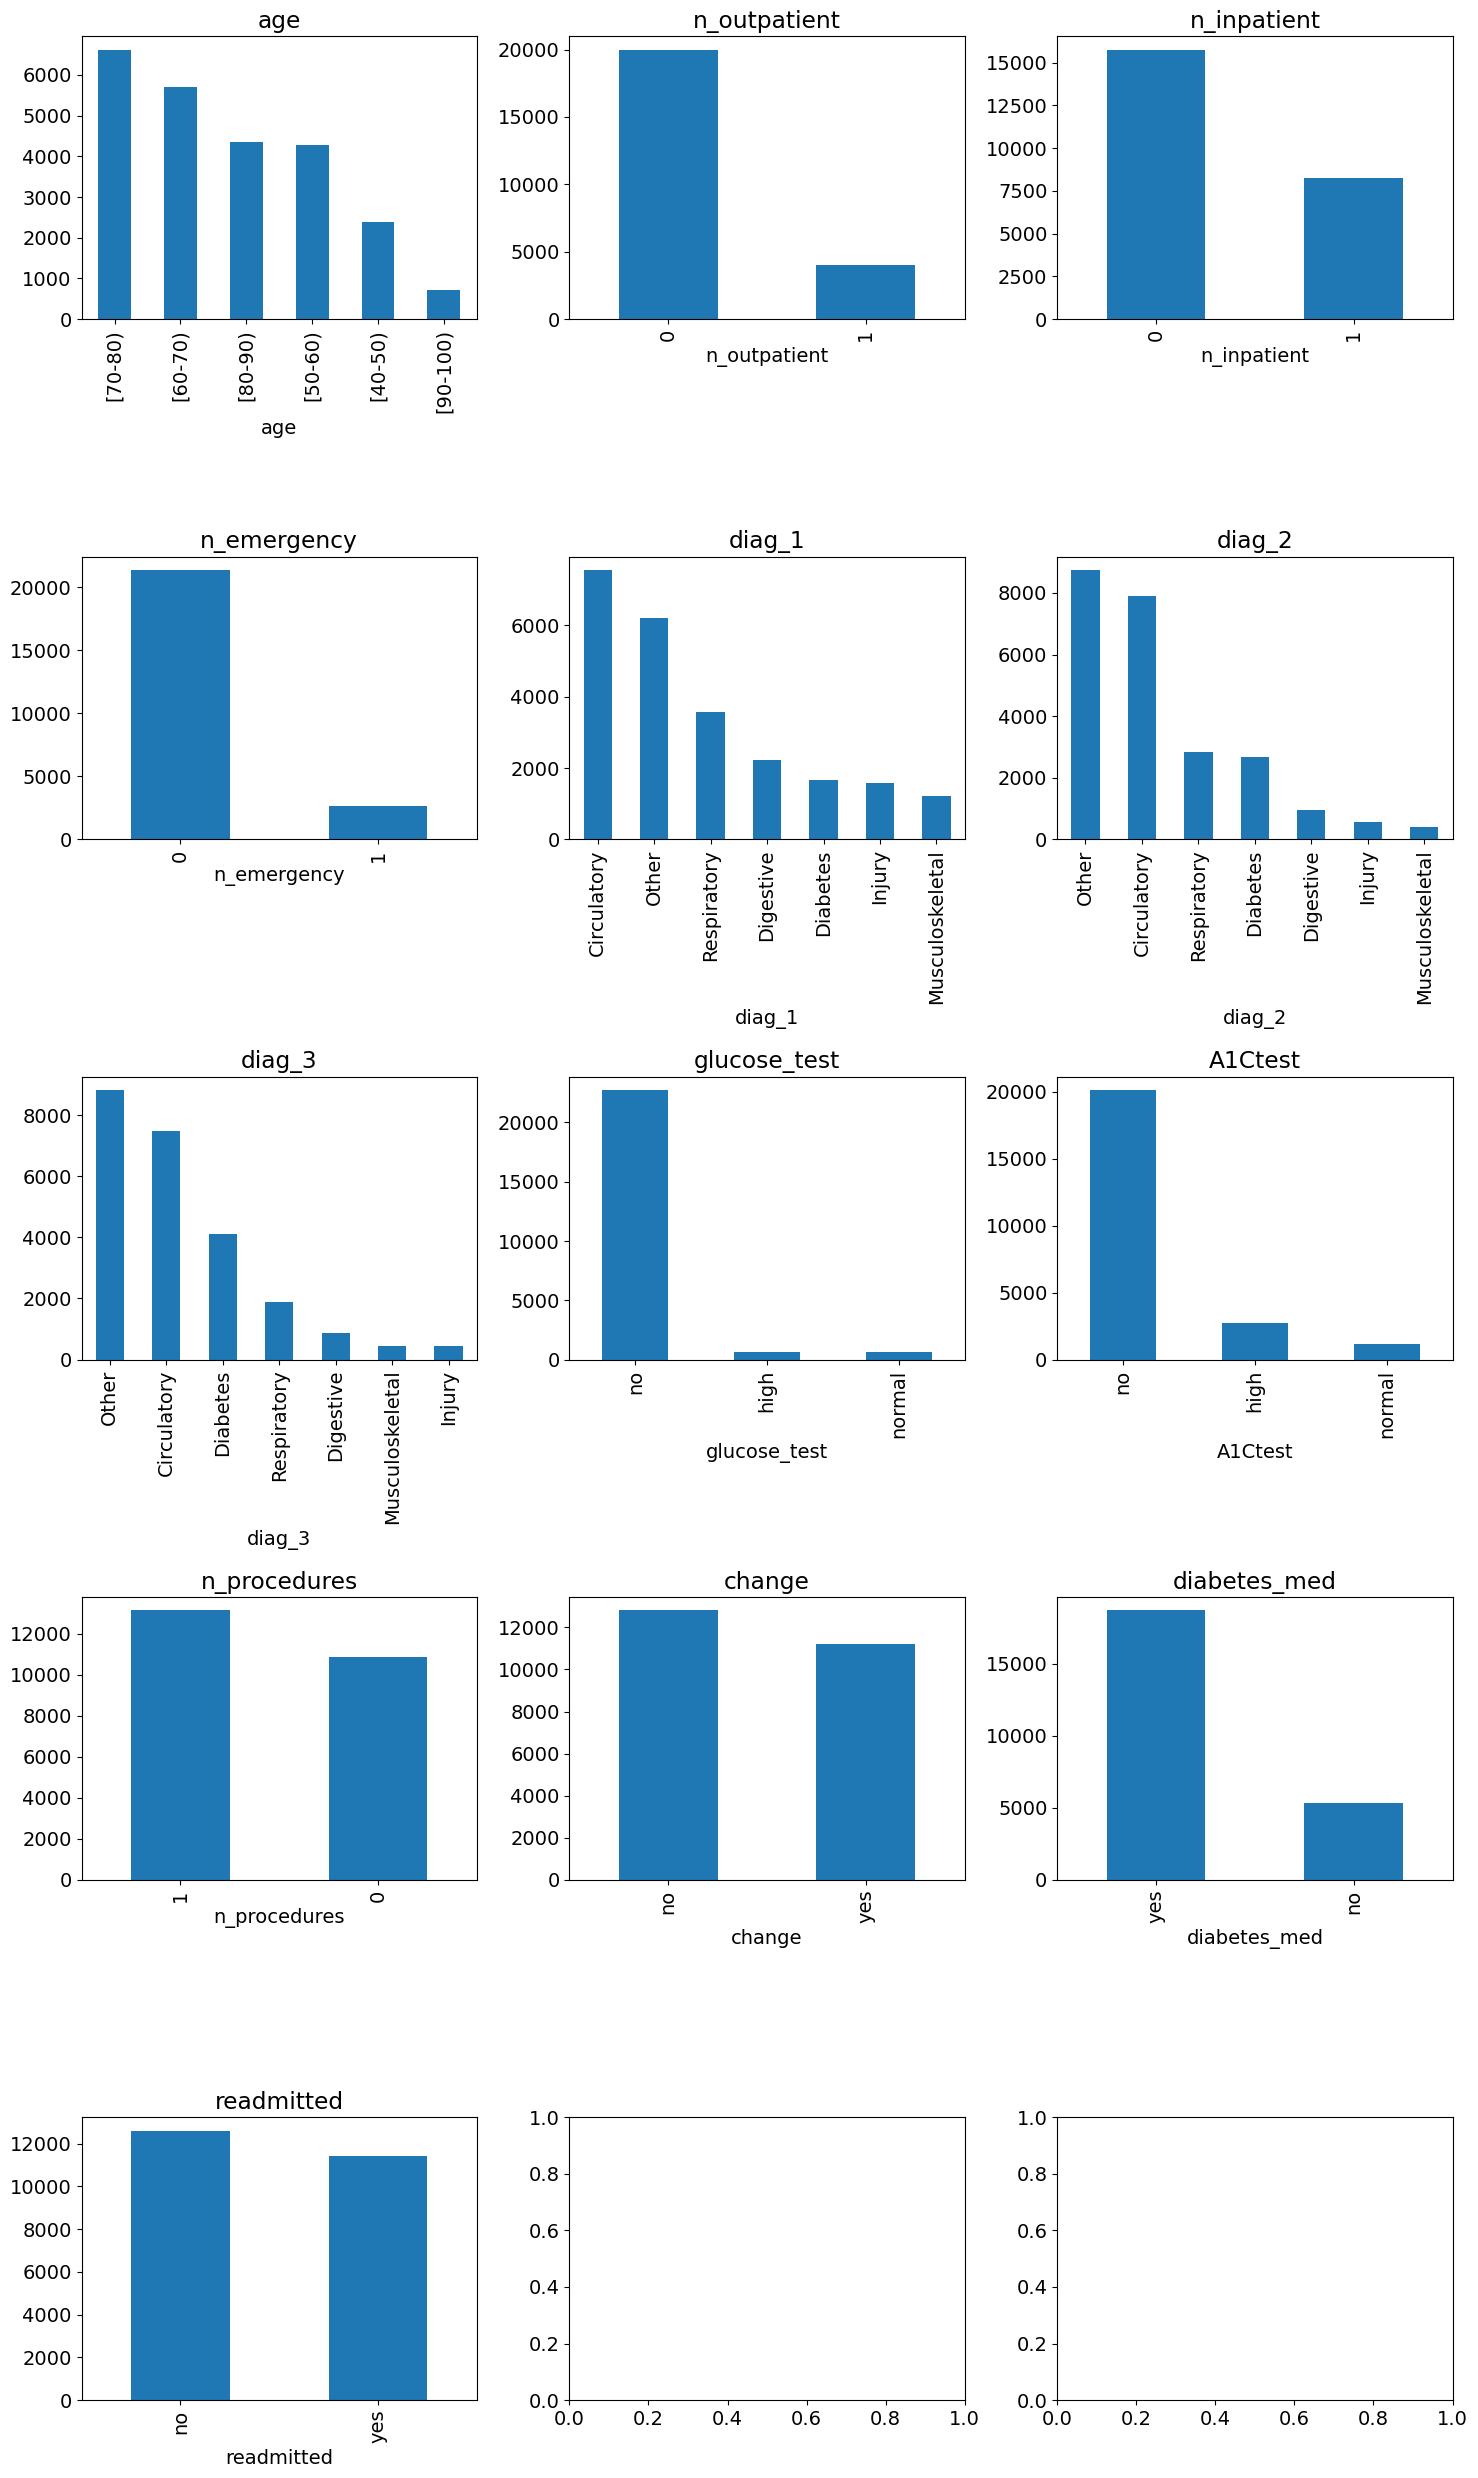

In [21]:
def plot_bars_dynamic_rows(df, columns):
    n_cols = len(columns)
    n_rows = math.ceil(n_cols / 3)
    fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5*n_rows))

    for i in range(n_cols):
        r = i // 3
        c = i % 3
        df[columns[i]].value_counts().plot(kind='bar', ax=axes[r, c])
        axes[r, c].set_title(columns[i])
        axes[r, c].set_xlabel(columns[i])

    fig.tight_layout()
    plt.show()
columns_to_plot = ['age','n_outpatient', 'n_inpatient', 'n_emergency','diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'n_procedures','change', 'diabetes_med', 'readmitted']
plot_bars_dynamic_rows(df, columns_to_plot)


# Bivariate analysis

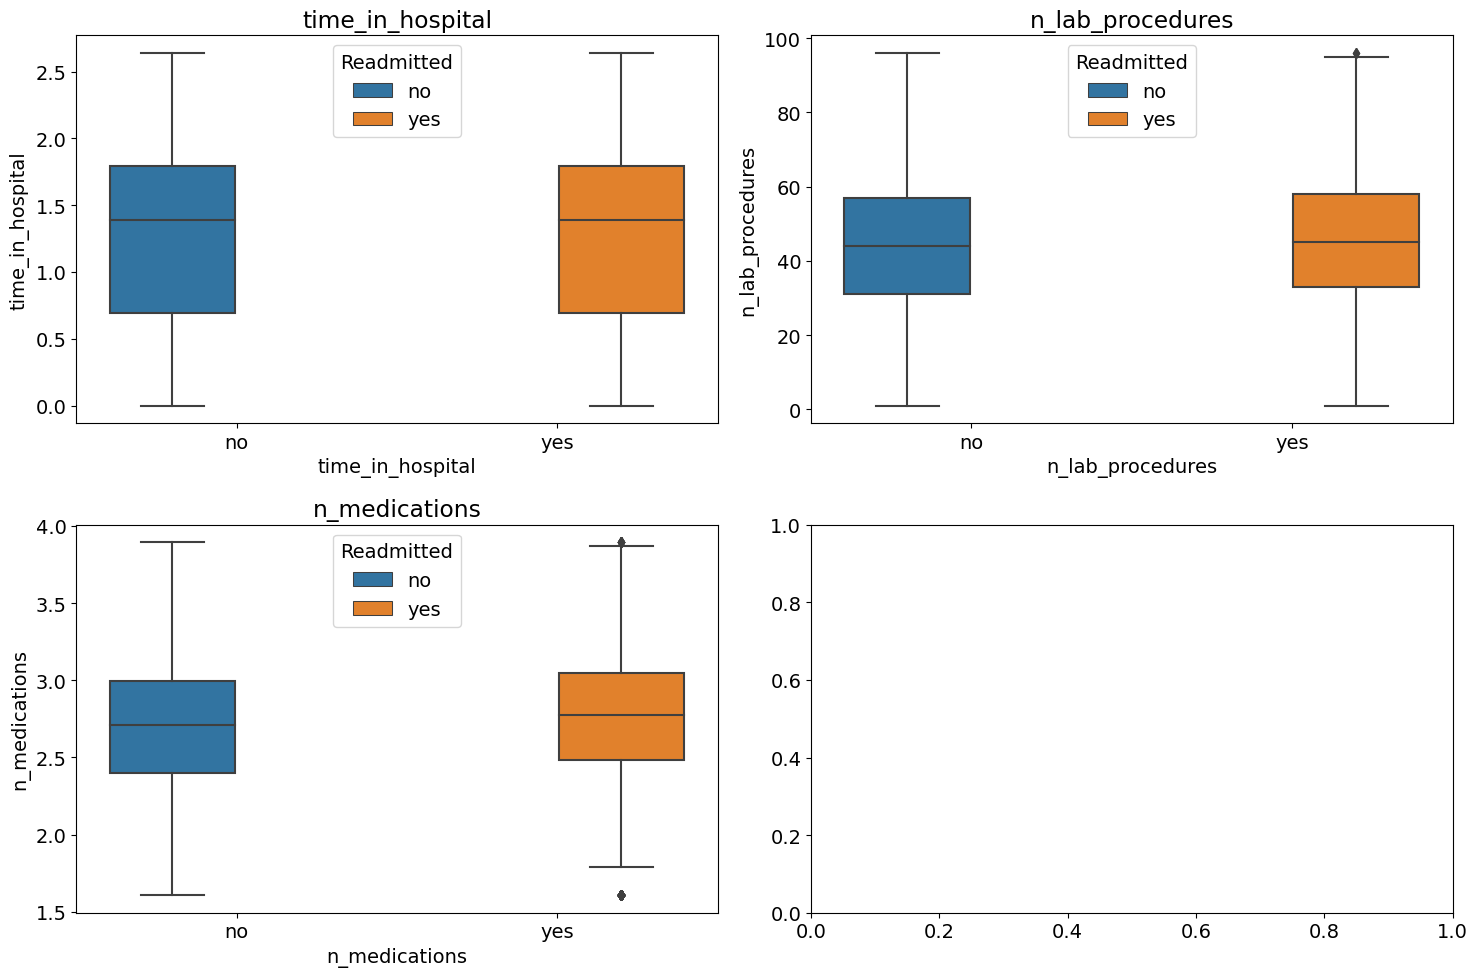

In [22]:
def plot_boxplots_two_cols(df, columns):
    n_cols = len(columns)
    n_rows = math.ceil(n_cols / 2)
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5*n_rows))

    for i in range(n_cols):
        r = i // 2
        c = i % 2
        column_data = df[columns[i]]
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1
        column_data = column_data[(column_data >= Q1 - 1.5*IQR) & (column_data <= Q3 + 1.5*IQR)]
        sns.boxplot(x="readmitted", y=columns[i], data=df, ax=axes[r, c], hue='readmitted')
        axes[r, c].set_title(columns[i])
        axes[r, c].set_xlabel(columns[i])
        axes[r, c].legend(title='Readmitted', loc='upper center')

    fig.tight_layout()
    plt.show()

columns_to_plot = ["time_in_hospital", "n_lab_procedures", "n_medications"]
plot_boxplots_two_cols(df, columns_to_plot)

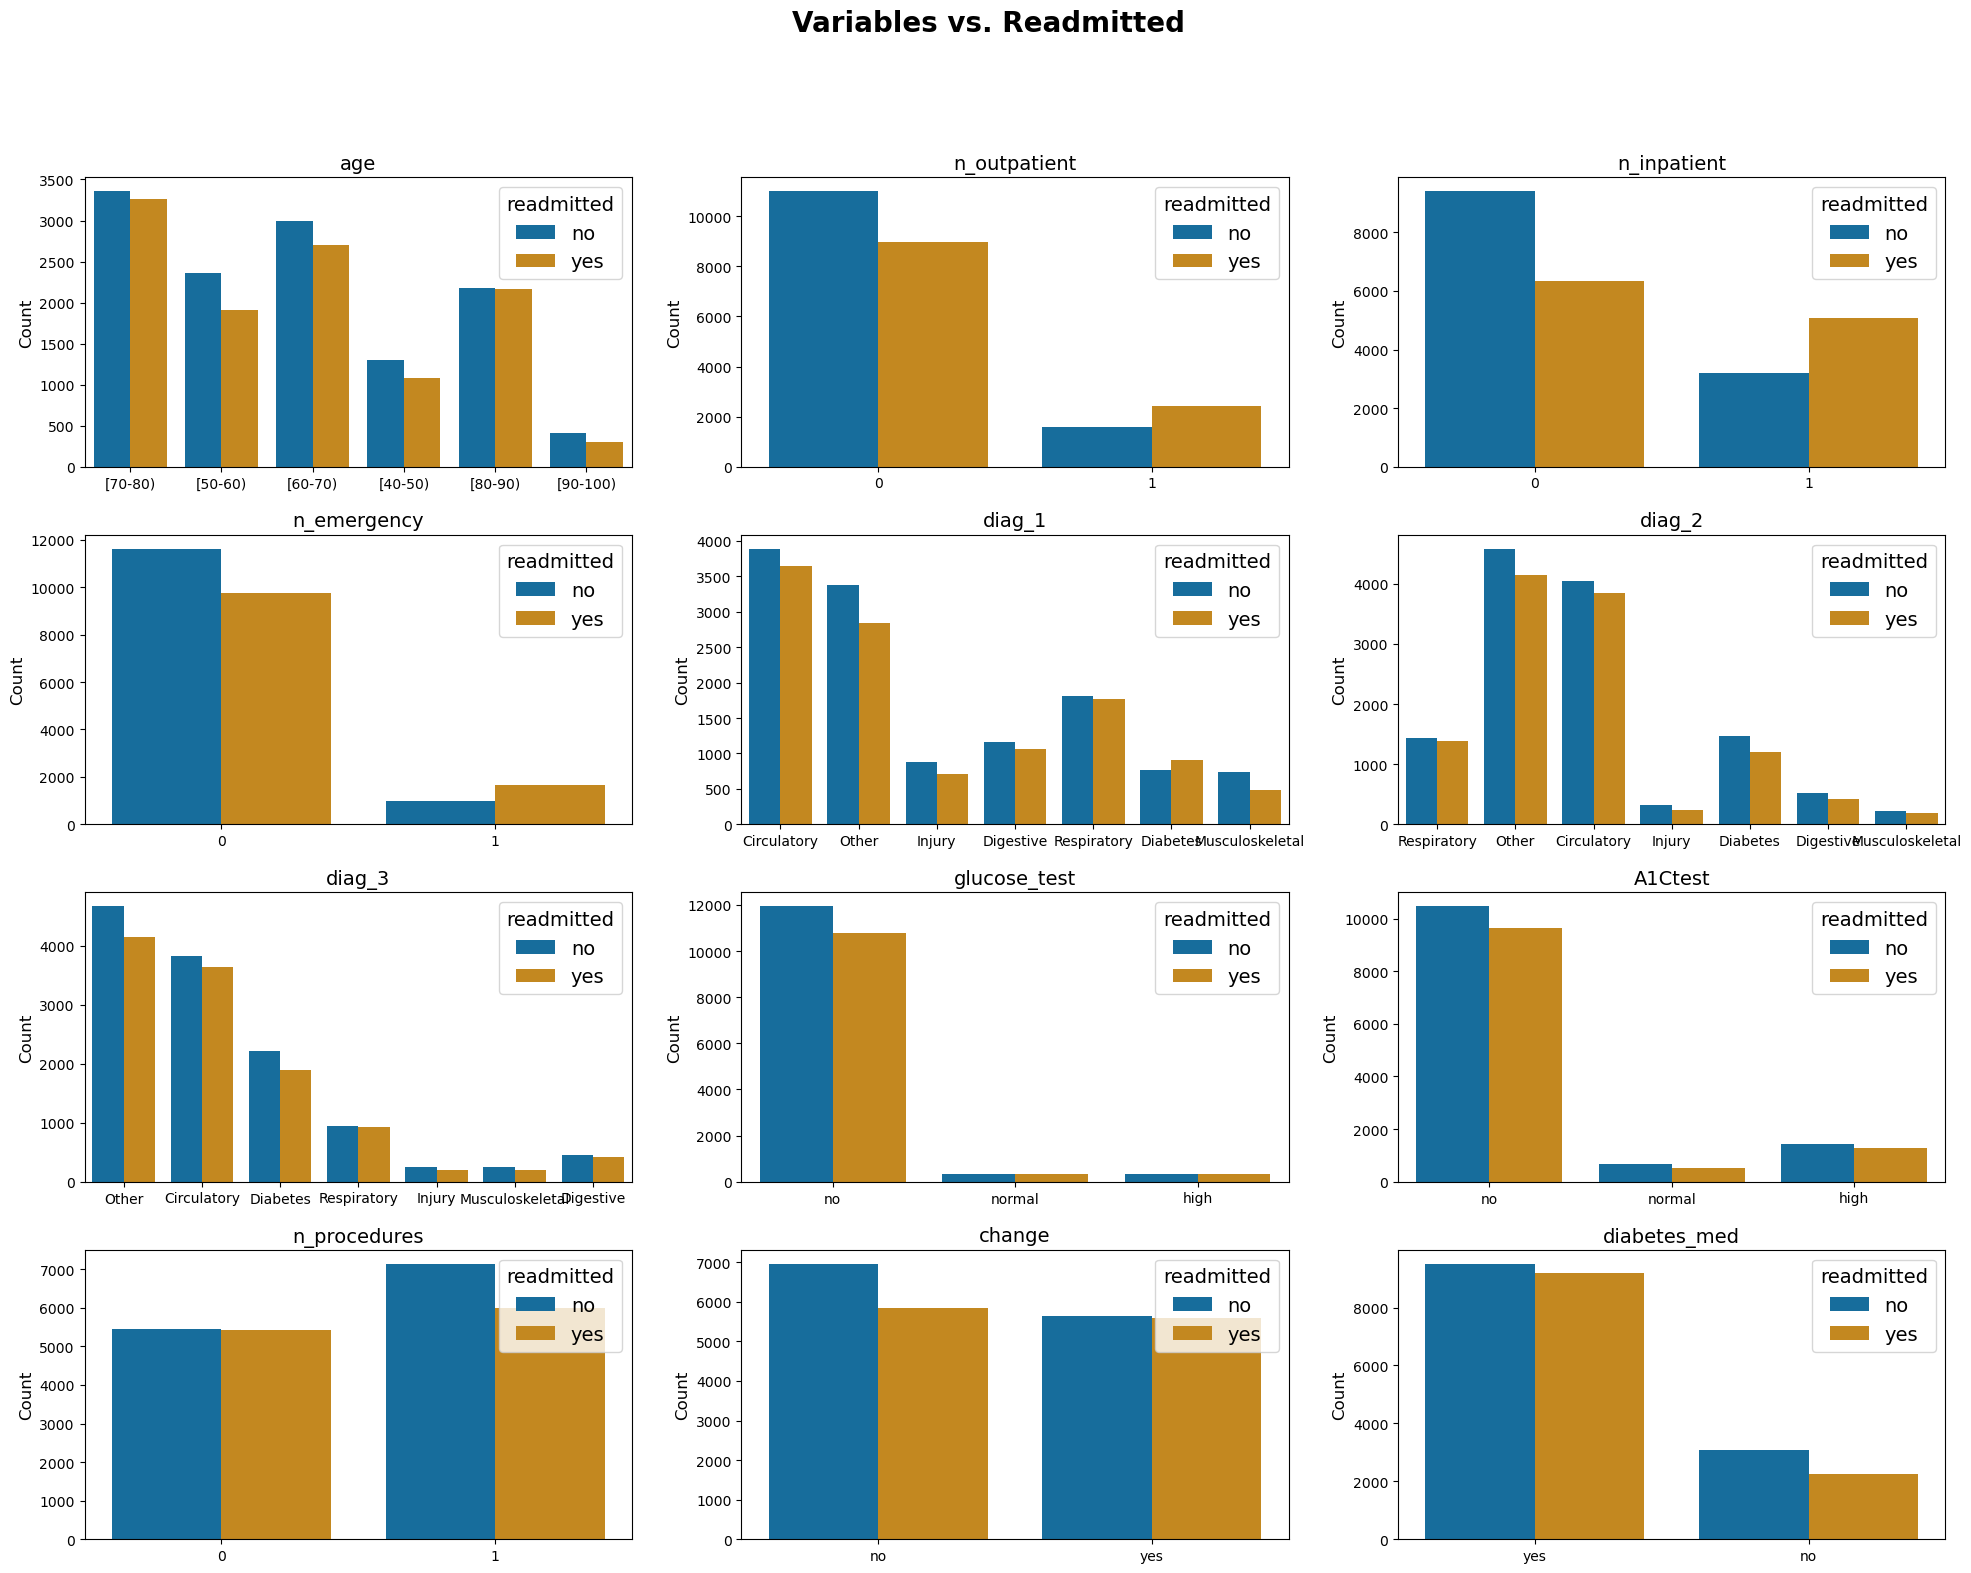

In [23]:
# Create a list of variables to plot
variables = ['age', 'bmi','n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest','n_procedures', 'change', 'diabetes_med']

# Set the figure size and create a subplot grid with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

# Loop through the variables and plot each one against readmitted
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.countplot(x=var, hue='readmitted', data=df, ax=axes[row, col], palette='colorblind')
    axes[row, col].set_title(var, fontsize=14)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count', fontsize=12)
    axes[row, col].tick_params(axis='both', labelsize=10)
    
# Add a main title to the entire plot
fig.suptitle('Variables vs. Readmitted', fontsize=20, fontweight='bold', y=1.05)

# Adjust the subplot spacing
fig.tight_layout()

# Modelling

# B 

Based on the given inputs and the task of hospital readmission prediction using clinical features, several algorithms are being considered. Here are details regarding algorithms that we have selected:
Logistic Regression: Logistic regression is a widely used algorithm for binary classification problems. It models the relationship between the clinical features and the probability of readmission. We will also do selection of features with p value of 0.05 or lower and deploy best fit model. and cross validation to confirm that the 80 to 20 train and test results are accurate representation for the data.

Random Forest: Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It can handle a large number of input features and captures complex interactions between them. Random Forest also provides feature importance measures, which can be useful in understanding the contribution of different features to readmission prediction. Feature Selection of 10 to variables and Random Forest Gradient Boosting which is an extension of Random Forest that combines the ensemble approach with gradient boosting.

Bagging (Bootstrap Aggregating) is an ensemble learning technique that involves creating multiple subsets of the original dataset through random sampling with replacement using decision tree. Bagging helps to reduce variance and improve the stability and accuracy of the model.

Stacking: Stacking is an ensemble learning technique that combines multiple models by training a meta-model to make predictions based on the outputs of the individual models. the following models will be used in the stalking: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier.

K-Nearest Neighbours (KNN): KNN is a non-parametric classification algorithm that classifies new instances based on their similarity to known instances in the training data. KNN can handle multi-class classification problems which is needed for this dataset.

Neural Networks: They can capture complex patterns and relationships in the data but may require larger amounts of training data and computational resources, as the hospital readmission is an issue that hasn't been solved with, using deep learning can be great approach

We will choose the best model according to the output metrics particularly recall metric.

## Normalization of dataset

In [24]:
label_encoder_age = LabelEncoder()
label_encoder_n_outpatient = LabelEncoder()
label_encoder_n_inpatient = LabelEncoder()
label_encoder_n_emergency = LabelEncoder()
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()
label_encoder_glucose_test = LabelEncoder()
label_encoder_A1Ctest = LabelEncoder()
label_encoder_diabetes_med = LabelEncoder()
label_encoder_change = LabelEncoder()
label_encoder_n_procedures = LabelEncoder()
label_encoder_readmitted = LabelEncoder()


df['age'] = label_encoder_age.fit_transform(df['age'])
df['n_outpatient'] = label_encoder_n_outpatient.fit_transform(df['n_outpatient'])
df['n_inpatient'] = label_encoder_n_inpatient.fit_transform(df['n_inpatient'])
df['n_emergency'] = label_encoder_n_emergency.fit_transform(df['n_emergency'])
df['diag_1'] = label_encoder_diag_1.fit_transform(df['diag_1'])
df['diag_2'] = label_encoder_diag_2.fit_transform(df['diag_2'])
df['diag_3'] = label_encoder_diag_3.fit_transform(df['diag_3'])
df['glucose_test'] = label_encoder_glucose_test.fit_transform(df['glucose_test'])
df['A1Ctest'] = label_encoder_A1Ctest.fit_transform(df['A1Ctest'])
df['diabetes_med'] = label_encoder_diabetes_med.fit_transform(df['diabetes_med'])
df['n_procedures'] = label_encoder_n_procedures.fit_transform(df['n_procedures']) 
df['change'] = label_encoder_change.fit_transform(df['change']) 
df['readmitted'] = label_encoder_readmitted.fit_transform(df['readmitted'])

# Regression Model

## Full Model

In [25]:
# Select the predictor variables (X) and target variable (y)
X = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1',
        'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = df['readmitted']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the GLM model
model = sm.GLM(y, X, family=sm.families.Binomial())  # Assuming binary logistic regression
result = model.fit()

# Print the summary of the model
print(result.summary())
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix

# Obtain the predicted probabilities
y_pred_proba = result.predict(X)

# Convert predicted probabilities to binary predictions
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y, y_pred_proba)
print("AUC:", auc)

# Calculate recall
recall = recall_score(y, y_pred)
print("Recall:", recall)

#Calculate precision
precision = precision_score(y, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                24031
Model:                            GLM   Df Residuals:                    24015
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15906.
Date:                Wed, 24 May 2023   Deviance:                       31812.
Time:                        12:56:54   Pearson chi2:                 2.40e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05834
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9105      0.115  

### Predictor variable selection 
We will use 2 Test-based and 1 Criteron based selection procedure at p-value of 0.05

In [26]:
# Separate the predictor variables (X) and the target variable (y)
X = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1',
        'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = df['readmitted']

# Forward Selection
def forward_selection(X, y):
    features = list(X.columns)
    selected_features = []
    while len(features) > 0:
        best_pvalue = 1
        best_feature = None
        for feature in features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        if best_pvalue < 0.05:  # Set significance level here
            selected_features.append(best_feature)
            features.remove(best_feature)
        else:
            break
    return selected_features

forward_selected_features = forward_selection(X, y)
print("Forward Selection:", forward_selected_features)


# Backward Elimination
def backward_elimination(X, y):
    features = list(X.columns)
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        pvalues = model.pvalues[1:]  # Exclude the constant term
        max_pvalue = pvalues.max()
        if max_pvalue >= 0.05:  # Set significance level here
            excluded_feature = pvalues.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

backward_selected_features = backward_elimination(X, y)
print("Backward Elimination:", backward_selected_features)


# Stepwise Selection
def stepwise_selection(X, y):
    features = list(X.columns)
    selected_features = []
    while len(features) > 0:
        best_pvalue = 1
        best_feature = None
        for feature in features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        if best_pvalue < 0.05:  # Set significance level here
            selected_features.append(best_feature)
            features.remove(best_feature)
        else:
            break

        while len(selected_features) > 0:
            model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
            pvalues = model.pvalues[1:]  # Exclude the constant term
            max_pvalue = pvalues.max()
            if max_pvalue >= 0.05:  # Set significance level here
                excluded_feature = pvalues.idxmax()
                selected_features.remove(excluded_feature)
            else:
                break
    return selected_features

stepwise_selected_features = stepwise_selection(X, y)
print("Stepwise Selection:", stepwise_selected_features)


Forward Selection: ['n_inpatient', 'n_outpatient', 'n_emergency', 'diabetes_med', 'time_in_hospital', 'n_procedures', 'diag_1', 'n_medications', 'age', 'diag_3']
Backward Elimination: ['age', 'time_in_hospital', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1', 'diag_3', 'diabetes_med']
Stepwise Selection: ['n_inpatient', 'n_outpatient', 'n_emergency', 'diabetes_med', 'time_in_hospital', 'n_procedures', 'diag_1', 'n_medications', 'age', 'diag_3']


### Best Fit Model

In [27]:
# Select the predictor variables (X) and target variable (y)
X = df[['age', 'time_in_hospital', 'diag_3', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1',
        'diabetes_med']]
y = df['readmitted']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the GLM model
model = sm.GLM(y, X, family=sm.families.Binomial())  # Assuming binary logistic regression
result = model.fit()

# Print the summary of the model
print(result.summary())


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix

# Obtain the predicted probabilities
y_pred_proba = result.predict(X)

# Convert predicted probabilities to binary predictions
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y, y_pred_proba)
print("AUC:", auc)

# Calculate recall
recall = recall_score(y, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                24031
Model:                            GLM   Df Residuals:                    24020
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15910.
Date:                Wed, 24 May 2023   Deviance:                       31821.
Time:                        12:56:59   Pearson chi2:                 2.40e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05799
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9941      0.090  

### Cross Validation 5 fold

In [28]:

# Select the predictor variables (X) and target variable (y)
X = df[['age', 'time_in_hospital', 'diag_3', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1',
        'diabetes_med']]
y = df['readmitted']

# Initialize KFold with the desired number of folds
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Initialize an array to store the cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for each fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Add a constant term to the predictor variables
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Fit the GLM model
    model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
    result = model.fit()

    # Make predictions on the test set
    y_pred = np.where(result.predict(X_test) >= 0.5, 1, 0)

    # Calculate the accuracy score for the fold
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list of cross-validation scores
    cv_scores.append(accuracy)


# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))
    
# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Cross-Validation Scores: [0.6053671728728937, 0.6096545984186433, 0.605076987099459, 0.6036204744069913, 0.61090303786933]
Mean Accuracy: 0.6069244541334634
Standard Deviation: 0.002829747612787971
AUC: 0.6060593858693011
Recall: 0.503056768558952
Precision: 0.6114649681528662
F1-score: 0.5519885002395785
Confusion Matrix:
[[1784  732]
 [1138 1152]]


# Random Forest

In [29]:
# Select the predictor variables (X) and target variable (y)
X = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
          'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1',
          'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)


# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Access the feature importances
importances = rf.feature_importances_

# Create a dictionary to map feature names to importance values
feature_importance_dict = dict(zip(X.columns, importances))

# Sort the feature importance values in descending order
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the feature importances
print("Feature Importance:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


Accuracy: 0.5864364468483462
AUC: 0.5825021288955488
Recall: 0.5161432994250331
Precision: 0.5662299854439592
F1-score: 0.5400277649236463
Confusion Matrix:
[[1652  894]
 [1094 1167]]
Feature Importance:
n_lab_procedures: 0.21456459951138607
n_medications: 0.17462130845212426
time_in_hospital: 0.11912658677266261
age: 0.08625901192356113
diag_1: 0.07911958143938032
diag_3: 0.07588396886880415
diag_2: 0.07442067037945398
n_inpatient: 0.03793789427897903
A1Ctest: 0.0298020903471505
change: 0.02448041586214223
n_procedures: 0.02325375180810562
n_outpatient: 0.01703103137517515
glucose_test: 0.015201112404839056
diabetes_med: 0.014251249761656067
n_emergency: 0.014046726814579729


### Top 10 important features selected from above

In [41]:
# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Select the top-k most important features
k = 10
selected_features = X_train.columns[sorted_indices[:k]]

# Use the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the classifier using only the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the classifier with selected features
y_pred_selected = rf_selected.predict(X_test_selected)

# Evaluate the model's performance with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy with selected features: 0.5866444768046599
AUC: 0.5984936001109007
Recall: 0.48606811145510836
Precision: 0.5989100817438692
F1-score: 0.53662109375
Confusion Matrix:
[[1810  736]
 [1162 1099]]


### Random Forest Gradient Boosting

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.6107759517370501
AUC: 0.6044891640866873
Recall: 0.4984520123839009
Precision: 0.6046137339055794
F1-score: 0.5464242424242424
Confusion Matrix:
[[1809  737]
 [1134 1127]]


### Bagging

In [32]:
# Select the predictor variables (X) and target variable (y)
X = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1',
        'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base classifier (decision tree in this case)
base_classifier = DecisionTreeClassifier()

# Create a bagging classifier
bagging = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Fit the bagging classifier on the training data
bagging.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = bagging.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5716663199500728
AUC: 0.5643008971066824
Recall: 0.4400707651481645
Precision: 0.5564876957494407
F1-score: 0.49147937762410465
Confusion Matrix:
[[1753  793]
 [1266  995]]


# Stacking

In [33]:
# Select the features and target variable
X = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1',
        'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train first-level models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Step 2: Generate first-level predictions
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# Step 3: Create the stacked dataset
stacked_dataset = np.column_stack((lr_pred, dt_pred, rf_pred, gb_pred))

# Step 4: Train the second-level model
stacked_model = LogisticRegression()
stacked_model.fit(stacked_dataset, y_test)

# Step 5: Evaluate the stacked model
lr_pred_stack = lr.predict(X_test)
dt_pred_stack = dt.predict(X_test)
rf_pred_stack = rf.predict(X_test)
gb_pred_stack = gb.predict(X_test)

stacked_dataset_stack = np.column_stack((lr_pred_stack, dt_pred_stack, rf_pred_stack, gb_pred_stack))
final_pred = stacked_model.predict(stacked_dataset_stack)

accuracy = accuracy_score(y_test, final_pred)
print("Stacked Model Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, final_pred)
print("AUC:", auc)

# Calculate the recall score
recall = recall_score(y_test, final_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, final_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, final_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, final_pred)
print("Confusion Matrix:")
print(confusion_mat)

Stacked Model Accuracy: 0.6107759517370501
AUC: 0.6044891640866873
Recall: 0.4984520123839009
Precision: 0.6046137339055794
F1-score: 0.5464242424242424
Confusion Matrix:
[[1809  737]
 [1134 1127]]


# KNN

In [34]:
# Select the predictor variables (X) and target variable (y)
X = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1', 'diag_2', 'diag_3',
        'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.545038485541918
Recall: 0.46926138876603274
Precision: 0.51806640625
F1-score: 0.4924576467857972
Confusion Matrix:
[[1559  987]
 [1200 1061]]


# Neural Network

In [37]:
# Select the predictor variables (X) and target variable (y)
X = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
        'n_outpatient', 'n_inpatient', 'n_emergency', 'diag_1', 'diag_2', 'diag_3',
        'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5743707093821511
AUC: 0.5688837986097818
Recall: 0.4763379035824856
Precision: 0.555440948942754
F1-score: 0.5128571428571428
Confusion Matrix:
[[1684  862]
 [1184 1077]]


### Hyper Parameter tunning:
In this case we have chosen Random Forest to be the best model.

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics using the best model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Best Model:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Best Hyperparameters:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Evaluation Metrics for Best Model:
Accuracy: 0.60515914291658
AUC: 0.5984936001109007
Recall: 0.48606811145510836
Precision: 0.5989100817438692
F1-score: 0.53662109375
Confusion Matrix:
[[1810  736]
 [1162 1099]]


### C1

The success of the system is measured through various evaluation metrics depending on the model, we have used the following:

Accuracy: It measures the overall correctness of the predictions and is calculated as the ratio of correctly predicted instances to the total number of instances.

Recall: It measures the proportion of true positive predictions out of all actual positive instances. It indicates the model's ability to correctly capture all readmissions.

Precision: It measures the proportion of true positive predictions out of all positive predictions. It indicates the model's ability to correctly identify readmissions.

F1-score: It is the harmonic mean of precision and recall, providing a balanced measure of both metrics.

Area Under the ROC Curve (AUC): It quantifies the model's ability to distinguish between readmissions and non-readmissions by measuring the area under the Receiver Operating Characteristic (ROC) curve. A higher AUC indicates better discrimination, its not applicaible with some model such as KNN.

Confusion Matrix: It provides a detailed breakdown of true positives, true negatives, false positives, and false negatives, enabling a deeper understanding of the model's performance.

These metrics collectively provide a comprehensive evaluation of the system’s performance. Considering accuracy, capturing readmission, precision, discrimination ability, and detailed breakdown of prediction outcomes.

### C2

Hyper parameter tunning didnt yeild in better metrics, therefore will stick with Random Forest Model.

In the medical field, recall is often an important metric. High recall means that the model can effectively capture a higher proportion of true positive cases of readmission. Therefore, we have chosen Random Forest model which has the highest recall 51.6 percentage with 56.6 percent precision, although other metrics are slightly lower than other models, but overall, this results indicates that the model is better at correctly identifying actual readmissions. Hospital readmission has been a difficult topic to predict as there are research papers that had similar prediction power, such as "Kansagara, MD, MCR et.al." has AUC of 0.55 - 0.65 and we had 0.58 AUC for random forest but we had as high as 0.63 with full/best fit regression models. therefore, we conclude that not everything in real world can be predicted as important features may be overlooked or deemed not important.

### D

Data Bias: we do not know how the data was collected and whether those collected the data attempted to reduce bias or not, that is something we cannot confirm.
Data bias can contribute to low recall accuracy in the context of readmission prediction. Data bias refers to systematic errors or distortions in the data that can lead to inaccuracies or unfairness in the model's predictions. Here are some ways data bias can impact recall accuracy: Sample Selection Bias, Labelling Bias, Missing Data Bias, and Measurement Bias. These can introduce bias and affect the model's ability to predict readmissions accurately.

The steps we followed to prepare the data for modelling were to high standard, such as removing redundant variable, changing numerical variables to categorical variable. removing outliers.

Algorithmic Bias: we have deployed a diverse set of models and with feature selection in order to remove any algorithm bias, these models can be as good it can be. as the saying goes "garbage in garbage out", as we cannot confirm data's validity and whether the features used are the right predictors, and if we are missing any important readmission predictors such as socio-economics and demographic factors. the results obtain from this could be considered right for the data.


## Reference 

#### 1: Kansagara D, Englander H, Salanitro A, et al. Risk Prediction Models for Hospital Readmission: A Systematic Review. JAMA. 2011;306(15):1688–1698. doi:10.1001/jama.2011.1515
#### 2: Rubin, D.J. Hospital Readmission of Patients with Diabetes. Curr Diab Rep 15, 17 (2015). https://doi.org/10.1007/s11892-015-0584-7
#### 3: Author links open overlay panelArkaitz Artetxe a et al. (2018a) Predictive models for Hospital Readmission Risk: A systematic review of methods, Computer Methods and Programs in Biomedicine. Available at: https://www.sciencedirect.com/science/article/pii/S0169260717313998 (Accessed: 21 May 2023). 